In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [6]:
import os
import kagglehub

# Download dataset from Kaggle
path = kagglehub.dataset_download("camnugent/california-housing-prices")

# Print path to check where files are stored
print("Dataset Path:", path)

# List all files in the dataset directory
print("Files in dataset folder:", os.listdir(path))


Dataset Path: C:\Users\SabariSathish08\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1
Files in dataset folder: ['housing.csv']


In [7]:
file_path = os.path.join(path, "housing.csv")  # Change filename if necessary
df = pd.read_csv(file_path)
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [8]:
# Select 'median_income' for clustering
income_data = df[['median_income']]


In [9]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(income_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

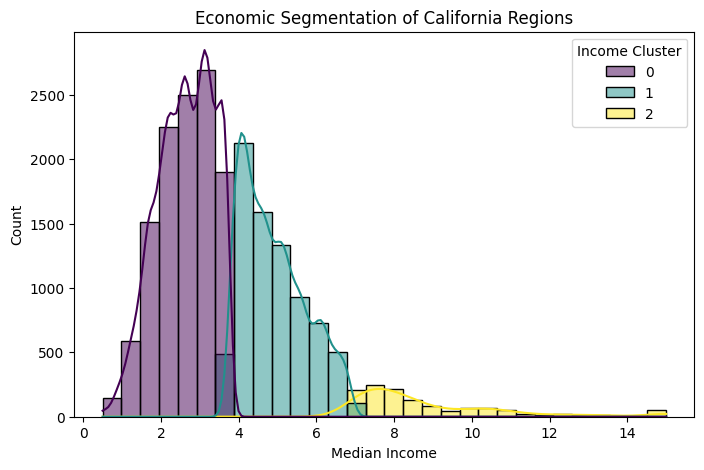

Income Cluster
0    2.623493
1    4.910008
2    8.883077
Name: median_income, dtype: float64


In [19]:
# Apply K-Means Clustering (choosing k=3 based on Elbow Method)
import matplotlib.pyplot as plt
import seaborn as sns
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Income Cluster'] = kmeans.fit_predict(income_data)

# Visualizing the Clusters
plt.figure(figsize=(8, 5))
sns.histplot(df, x="median_income", hue="Income Cluster", bins=30, palette="viridis", kde=True)
plt.xlabel("Median Income")
plt.ylabel("Count")
plt.title("Economic Segmentation of California Regions")
plt.show()

# Print cluster means
print(df.groupby("Income Cluster")["median_income"].mean())